In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## initall VIZ

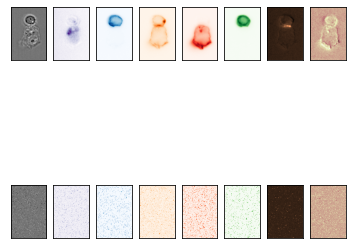

In [2]:
import h5py

colors = ["Greys", "Purples", "Blues", "Oranges", "Reds", "Greens", "copper", "pink"]

image = h5py.File("sample_image/sample_image.h5","r")["image"][()]
num_channels = image.shape[2]
h = image.shape[0]
w = image.shape[1]

fig, ax = plt.subplots(nrows = 2, ncols = num_channels, figsize = (3*2,3*2))

for j in range(num_channels):
    ax[0,j].imshow(image[:,:,j],  cmap = colors[j])
    ax[0,j].set_xticks([])
    ax[0,j].set_yticks([])
    
    ax[1,j].imshow(np.random.permutation(image[:,:,j].ravel()).reshape(h,w),  cmap = colors[j])
    ax[1,j].set_xticks([])
    ax[1,j].set_yticks([])


plt.savefig("sample_image/sample_image_and_permuation.png")
plt.savefig("sample_image/sample_image_and_permuation.svg")

## apoptotic cells

In [3]:
channel_importance = pd.read_csv("apoptotic_cells/channel_importance.csv")
interpretation_methods = ["PXPermute", "DeepLift", "IntegratedGradients", "LRP", "GuidedGradCAM"]
channel_importance.loc[:, interpretation_methods] = MinMaxScaler().fit_transform(channel_importance.loc[:, interpretation_methods])
channel_importance.head()

,fold,channel,PXPermute,DeepLift,IntegratedGradients,LRP,GuidedGradCAM
0,1,Ch0,0.016934,0.536150,0.965327,0.089264,0.147628
1,1,Ch1,0.967601,0.230190,0.059443,0.429087,0.147888
2,3,Ch0,0.000000,0.299684,0.475304,0.000000,0.158674
3,3,Ch1,0.918331,0.183626,0.135990,0.268165,1.000000
4,4,Ch0,0.015669,0.559447,0.734979,0.404710,0.221419


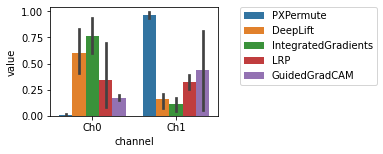

In [4]:

num_channels = len(channel_importance.channel.unique())

fig, ax = plt.subplots(figsize = (1.5*num_channels,2))

ax = sns.barplot(data = pd.melt(channel_importance, id_vars=["fold","channel"]),
                 x = "channel",
                 y = "value",
                 hue = "variable")

ax.legend(bbox_to_anchor=(1.1, 1.05))

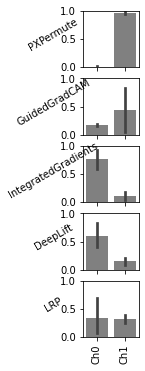

In [5]:
methods = ['PXPermute', 'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']


num_channels = len(channel_importance.channel.unique())
num_methods = len(methods)

fig, ax = plt.subplots(nrows = num_methods,figsize = (0.5*num_channels,num_methods+1), sharex = True, sharey = True)

for j , meth in enumerate(methods):
    
    ax[j] = sns.barplot(data = channel_importance,
                     x = "channel",
                     order = channel_importance.channel.unique(),
                     y = meth,
                     palette = ["gray"],
                    ax = ax[j])
    
    ax[j].set_ylim(0,1.) 
    ax[j].set_ylabel(meth, rotation = 30)
    ax[j].set_xlabel("")


ax[-1].set_xticklabels(channel_importance.channel.unique(), rotation = 90)

plt.savefig("final_figures/apoptotic_cells_channel_importance.png" , bbox_inches='tight')
plt.savefig("final_figures/apoptotic_cells_channel_importance.svg" , bbox_inches='tight')

In [6]:
methods = ['PXPermute', 'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']
num_channels_to_train = 1

for met in methods:
    channel = channel_importance.loc[:,["channel",met]].groupby("channel").mean().sort_values(met,ascending=False)
    channel = channel.index.tolist()[:num_channels_to_train]
    print(met, channel)
    print("----")

PXPermute ['Ch1']
----
GuidedGradCAM ['Ch1']
----
IntegratedGradients ['Ch0']
----
DeepLift ['Ch0']
----
LRP ['Ch0']
----


In [7]:
performance_all_channels = pd.read_csv("apoptotic_cells/performance_with_all_channels.csv")


performance_all_channels = performance_all_channels.dropna()[[
                           "f1_micro",
                           "f1_macro",
                           "accuracy"]]

performance_all_channels["method"] = "all channels"

performance = pd.read_csv("apoptotic_cells/results_with_best_channels.csv")

performance = performance[["method",
                           "f1_micro",
                           "f1_macro",
                           "accuracy"]]

performance = performance.append(performance_all_channels, ignore_index = True)

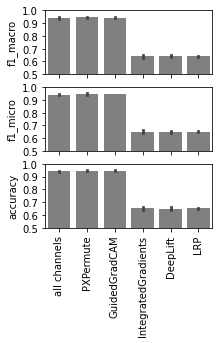

In [8]:
methods = ['all channels','PXPermute', 'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']


num_channels = len(channel_importance.channel.unique())
num_methods = len(methods)

fig, ax = plt.subplots(nrows = 3, figsize = (0.5*num_methods,4), sharex = True, sharey = True)

for j , metr in enumerate(["f1_macro","f1_micro", "accuracy"]):

    ax[j] = sns.barplot(data = performance,
               x = "method", 
                order = methods,
                y = metr,
               palette = ["gray"],
                    ax = ax[j])

    ax[j].set_ylim(0.5,1.)
    ax[j].set_yticks([0.5,0.6,0.7,0.8,0.9,1.])
    ax[j].set_xlabel("")


    
ax[-1].set_xticklabels(methods, rotation = "vertical")    
    


plt.savefig("final_figures/apoptotic_cells_performance.png" , bbox_inches='tight')
plt.savefig("final_figures/apoptotic_cells_performance.svg" , bbox_inches='tight')


## synapse formation

In [9]:
channel_importance = pd.read_csv("synapse_formation/channel_importance.csv")
interpretation_methods = ["PXPermute", "DeepLift", "IntegratedGradients", "LRP", "GuidedGradCAM"]
channel_importance.loc[:, interpretation_methods] = MinMaxScaler().fit_transform(channel_importance.loc[:, interpretation_methods])


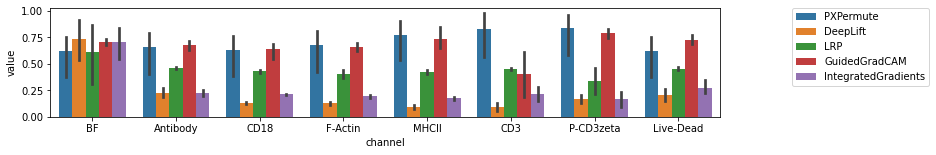

In [10]:

num_channels = len(channel_importance.channel.unique())

fig, ax = plt.subplots(figsize = (1.5*num_channels,2))

ax = sns.barplot(data = pd.melt(channel_importance, id_vars=["fold","channel"]),
                 x = "channel",
                 y = "value",
                 hue = "variable")

ax.legend(bbox_to_anchor=(1.1, 1.05))

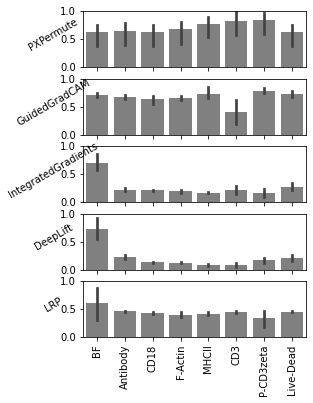

In [11]:
methods = ['PXPermute', 'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']


num_channels = len(channel_importance.channel.unique())
num_methods = len(methods)

fig, ax = plt.subplots(nrows = num_methods,figsize = (0.5*num_channels,num_methods+1), sharex = True, sharey = True)

for j , meth in enumerate(methods):
    
    ax[j] = sns.barplot(data = channel_importance,
                     x = "channel",
                     order = channel_importance.channel.unique(),
                     y = meth,
                     palette = ["gray"],
                    ax = ax[j])
    
    ax[j].set_ylim(0,1.) 
    ax[j].set_ylabel(meth, rotation = 30)
    ax[j].set_xlabel("")


ax[-1].set_xticklabels(channel_importance.channel.unique(), rotation = 90)

plt.savefig("final_figures/synapse_formation_channel_importance.png" , bbox_inches='tight')
plt.savefig("final_figures/synapse_formation_channel_importance.svg" , bbox_inches='tight')

In [12]:
methods = ['PXPermute', 'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']
num_channels_to_train = 3

for met in methods:
    channel = channel_importance.loc[:,["channel",met]].groupby("channel").mean().sort_values(met,ascending=False)
    channel = channel.index.tolist()[:num_channels_to_train]
    print(met, channel)
    print("----")

PXPermute ['P-CD3zeta', 'CD3', 'MHCII']
----
GuidedGradCAM ['P-CD3zeta', 'MHCII', 'Live-Dead']
----
IntegratedGradients ['BF', 'Live-Dead', 'Antibody']
----
DeepLift ['BF', 'Antibody', 'Live-Dead']
----
LRP ['BF', 'Antibody', 'Live-Dead']
----


In [13]:
performance_all_channels = pd.read_csv("synapse_formation/performance_with_all_channels.csv")


performance_all_channels = performance_all_channels.dropna()[[
                           "f1_macro",
                           "f1_micro",
                           "accuracy"]]

performance_all_channels["method"] = "all channels"

performance = pd.read_csv("apoptotic_cells/results_with_best_channels.csv")

performance = performance[["method",
                           "f1_macro",
                           "f1_micro",
                           "accuracy"]]

performance = performance.append(performance_all_channels, ignore_index = True)


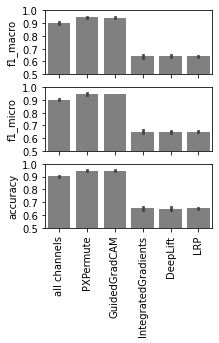

In [14]:
methods = ['all channels','PXPermute', 'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']


num_channels = len(channel_importance.channel.unique())
num_methods = len(methods)

fig, ax = plt.subplots(nrows = 3, figsize = (0.5*num_methods,4), sharex = True, sharey = True)

for j , metr in enumerate(["f1_macro","f1_micro", "accuracy"]):

    ax[j] = sns.barplot(data = performance,
               x = "method", 
                order = methods,
                y = metr,
               palette = ["gray"],
                    ax = ax[j])

    ax[j].set_ylim(0.5,1.)
    ax[j].set_yticks([0.5,0.6,0.7,0.8,0.9,1.])
    ax[j].set_xlabel("")


    
ax[-1].set_xticklabels(methods, rotation = "vertical")    
    



plt.savefig("final_figures/synapse_formation_performance.png" , bbox_inches='tight')
plt.savefig("final_figures/synapse_formation_performance.svg" , bbox_inches='tight')

## white blood cell

In [15]:
channel_importance = pd.read_csv("white_blood_cells/channel_importance.csv")
interpretation_methods = ["PXPermute", "DeepLift", "IntegratedGradients", "LRP", "GuidedGradCAM"]
channel_importance.loc[:, interpretation_methods] = MinMaxScaler().fit_transform(channel_importance.loc[:, interpretation_methods])


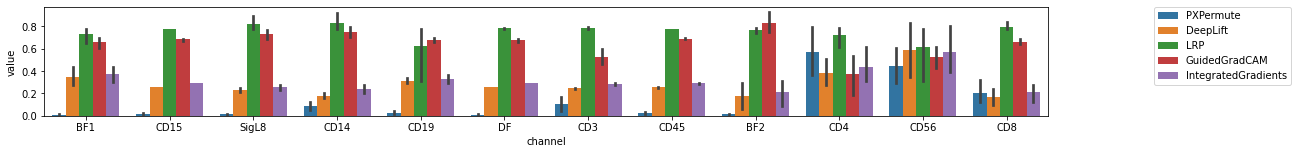

In [16]:

num_channels = len(channel_importance.channel.unique())

fig, ax = plt.subplots(figsize = (1.5*num_channels,2))

ax = sns.barplot(data = pd.melt(channel_importance, id_vars=["fold","channel"]),
                 x = "channel",
                 y = "value",
                 hue = "variable")

ax.legend(bbox_to_anchor=(1.1, 1.05))

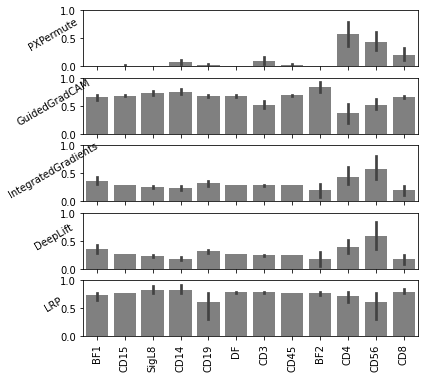

In [17]:
methods = ['PXPermute', 'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']


num_channels = len(channel_importance.channel.unique())
num_methods = len(methods)

fig, ax = plt.subplots(nrows = num_methods,figsize = (0.5*num_channels,num_methods+1), sharex = True, sharey = True)

for j , meth in enumerate(methods):
    
    ax[j] = sns.barplot(data = channel_importance,
                     x = "channel",
                     order = channel_importance.channel.unique(),
                     y = meth,
                     palette = ["gray"],
                    ax = ax[j])
    
    ax[j].set_ylim(0,1.) 
    ax[j].set_ylabel(meth, rotation = 30)
    ax[j].set_xlabel("")


ax[-1].set_xticklabels(channel_importance.channel.unique(), rotation = 90)


plt.savefig("final_figures/white_blood_cells_channel_importance.png" , bbox_inches='tight')
plt.savefig("final_figures/white_blood_cells_channel_importance.svg" , bbox_inches='tight')

In [18]:
methods = ['PXPermute', 'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']
num_channels_to_train = 6

for met in methods:
    channel = channel_importance.loc[:,["channel",met]].groupby("channel").mean().sort_values(met,ascending=False)
    channel = channel.index.tolist()[:num_channels_to_train]
    print(met, channel)
    print("----")

PXPermute ['CD4', 'CD56', 'CD8', 'CD3', 'CD14', 'CD19']
----
GuidedGradCAM ['BF2', 'CD14', 'SigL8', 'CD45', 'CD15', 'CD19']
----
IntegratedGradients ['CD56', 'CD4', 'BF1', 'CD19', 'DF', 'CD15']
----
DeepLift ['CD56', 'CD4', 'BF1', 'CD19', 'DF', 'CD15']
----
LRP ['CD14', 'SigL8', 'CD8', 'CD3', 'DF', 'CD45']
----


In [19]:
performance_all_channels = pd.read_csv("white_blood_cells/performance_with_all_channels.csv")


performance_all_channels = performance_all_channels.dropna()[[
                           "f1_macro",
                           "f1_micro",
                           "accuracy"]]

performance_all_channels["method"] = "all channels"

performance = pd.read_csv("apoptotic_cells/results_with_best_channels.csv")

performance = performance[["method",
                           "f1_macro",
                           "f1_micro",
                           "accuracy"]]

performance = performance.append(performance_all_channels, ignore_index = True)

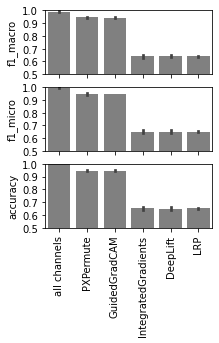

In [20]:
methods = ['all channels','PXPermute', 'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']


num_channels = len(channel_importance.channel.unique())
num_methods = len(methods)

fig, ax = plt.subplots(nrows = 3, figsize = (0.5*num_methods,4), sharex = True, sharey = True)

for j , metr in enumerate(["f1_macro","f1_micro", "accuracy"]):

    ax[j] = sns.barplot(data = performance,
               x = "method", 
                order = methods,
                y = metr,
               palette = ["gray"],
                    ax = ax[j])

    ax[j].set_ylim(0.5,1.)
    ax[j].set_yticks([0.5,0.6,0.7,0.8,0.9,1.])
    ax[j].set_xlabel("")


    
ax[-1].set_xticklabels(methods, rotation = "vertical")    
    


plt.savefig("final_figures/white_blood_cells_performance.png" , bbox_inches='tight')
plt.savefig("final_figures/white_blood_cells_performance.svg" , bbox_inches='tight')
